In [12]:
import os
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, Dataset, random_split
from torch.autograd import Variable
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split  
from torch.utils.tensorboard import SummaryWriter

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [28]:
csv_path = "180801_RFB_510cy_006_DC_20000.csv"
df = pd.read_csv(csv_path)


features_considered = ['전류(A)', '전압(V)', '누적_용량(Ah)']
features = df[features_considered]

In [29]:
print(features.head())

      전류(A)     전압(V)  누적_용량(Ah)
0  0.479619  1.173039   0.000133
1  0.479619  1.180239   0.000266
2  0.479557  1.183150   0.000400
3  0.479588  1.184682   0.000533
4  0.479588  1.185754   0.000666


C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50517 (\N{HANGUL SYLLABLE AB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45572 (\N{HANGUL SYLLABLE NU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) miss

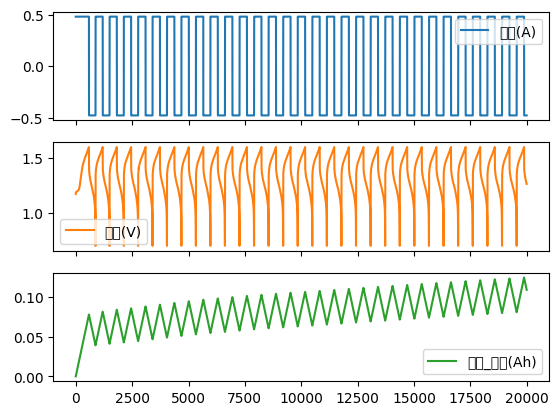

In [30]:
features.plot(subplots=True)
plt.show()

In [31]:
TRAIN_SPLIT = 20000

dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)
dataset = (dataset-data_mean)/data_std
print(dataset)

[[ 0.96048087 -1.10257215 -4.27005082]
 [ 0.96048087 -1.06019487 -4.26314897]
 [ 0.96035089 -1.04306364 -4.25624703]
 ...
 [-1.04227108 -0.55527418  1.3795372 ]
 [-1.04233607 -0.55888076  1.37263376]
 [-1.04233607 -0.56429062  1.3657301 ]]
